# Chocolate Sales EDA

### About Dataset

#### Description
This dataset contains detailed records of __chocolate sales__, including __product details__, __sales quantities__, __revenue__, and __customer segments__. <br>
It is designed for __sales forecasting__, __trend analysis__, and __business intelligence__, helping businesses optimize __pricing strategies__, __inventory management__, <br>
and __customer targeting__.

#### Columns

| Column |	Description|
|--------------------|---------------------------|
| Date |	The transaction date of the chocolate sale.|
| Product | Name	Name of the chocolate product sold.|
| Category |	Type of chocolate (Dark, Milk, White).
| Quantity | Sold	Number of chocolate units sold in the transaction.|
| Revenue |	Total revenue generated from the sale.|
| Customer | Segment	Type of customer (Retail, Wholesale).|
| Location |	Sales region or store location where the transaction took place.|

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 10,
                     'xtick.labelsize' : 10,
                     'ytick.labelsize' : 10})

In [2]:
data_path = "/workspace/data/atharvasoundankar/chocolate-sales/Chocolate Sales.csv"
df = pd.read_csv(data_path)
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


We can already identify 2 issues from the **Date** and **Amount**, both are of Dtype object. We will need to convert them properly.

In [4]:
_missing_data = df.isnull().sum()
missing_data = pd.DataFrame({
    "Total Missing": _missing_data,
    "Perc Missing": (_missing_data/len(df))*100})
missing_data

,Total Missing,Perc Missing
Sales Person,0,0.0
Country,0,0.0
Product,0,0.0
Date,0,0.0
Amount,0,0.0
Boxes Shipped,0,0.0


From the displayed __missing data__ table, we seem to have a clean data :smiley:, do we?

In [5]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


The describe method on the dataframe is a quick way to quickly analyze the data. For example we can see that the mean is closer to the median, and the max value is large indicating that the data will be right skewed. A quick look at the describe should help you with the knowledge of your data distribution at least.

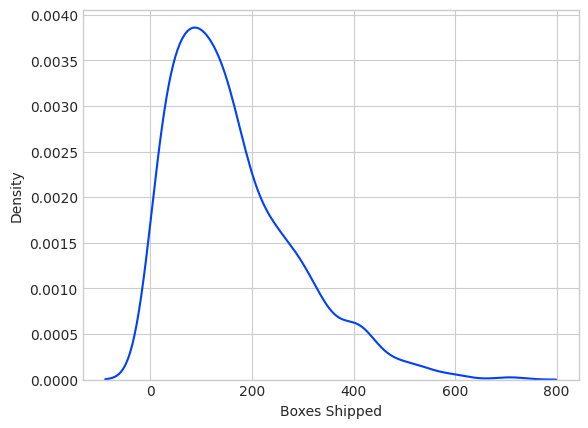

In [17]:
sns.kdeplot(data=df, x="Boxes Shipped")
plt.show()

### Product Analysis

Looking at the data we can deduce that it is a categorical (nominal) data, since there is no particular order in the chocolate product. Having this understanding will help to know what questions to ask. Such as: how many unique categories do we have?

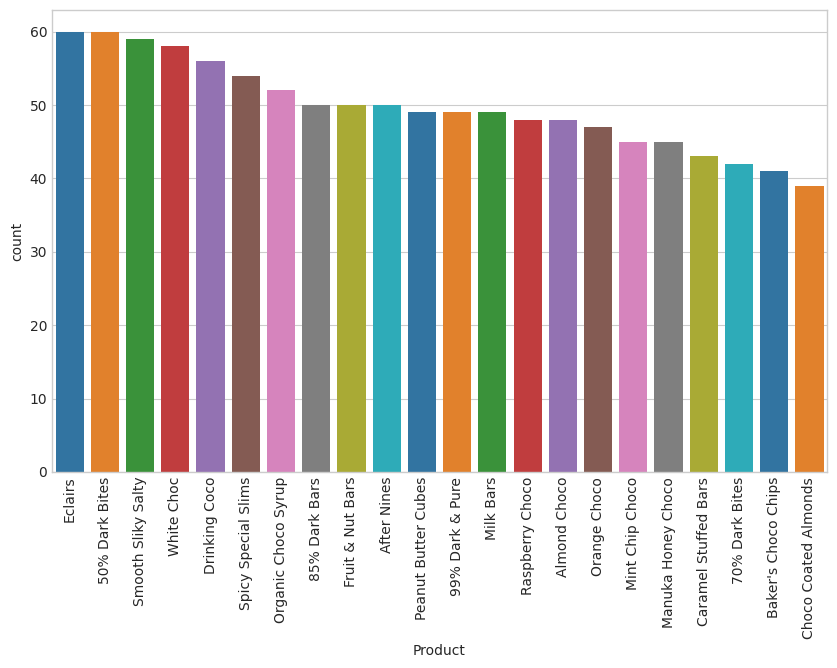

In [31]:
plt.figure(figsize=(10,6))

product_count = df["Product"].value_counts()

sns.barplot(data=product_count, palette="tab10")
plt.xticks(rotation=90)
plt.show()

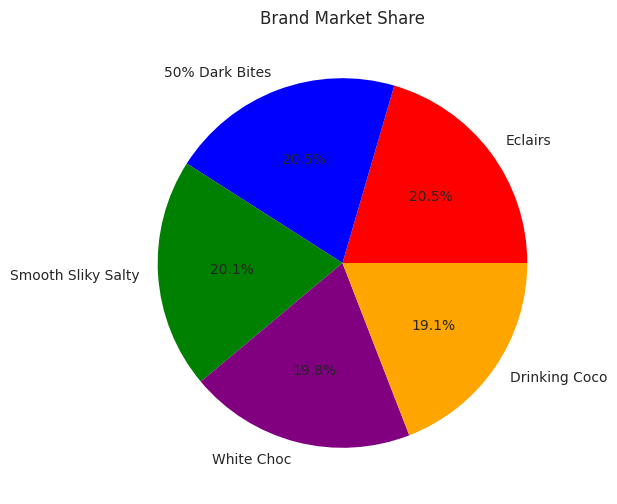

In [ ]:
# the use of pie chart here is not necessary, just some idea on how you can visualize categorical data

plt.figure(figsize=(6, 6))
df["Product"].value_counts()[:5].plot.pie(autopct='%1.1f%%', colors=['red', 'blue', 'green', 'purple', 'orange'])
plt.title("Top 5 Chocolate Share")
plt.ylabel("")
plt.show()

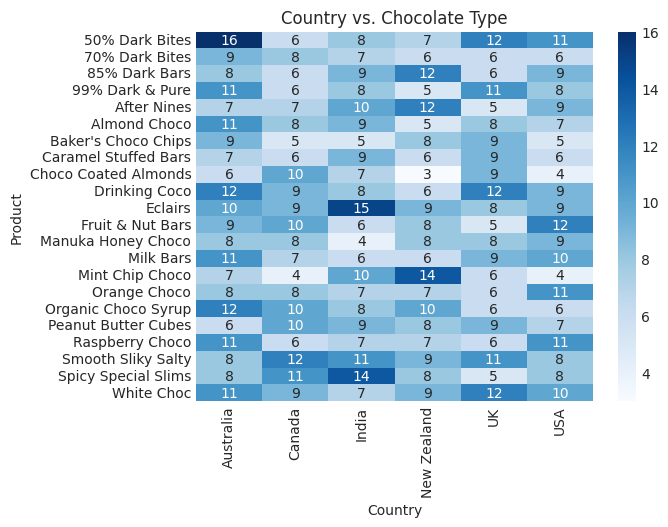

In [35]:
cross_tab = pd.crosstab(df["Product"], df["Country"])
sns.heatmap(cross_tab, annot=True, cmap="Blues")
plt.title("Country vs. Chocolate Type")
plt.xticks(rotation=90)
plt.show()

In most cases, analyzing categorical data involves combining/comparing it with a different data, like we did in the case of __Country vs. Chocolate Type__

Enough on product for now, lets do some data formatting, remember the amount and date, let's fix those.

In [ ]:

df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float) 
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()

In [43]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Day,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,Tuesday,January
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,Monday,August
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,Thursday,July
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,Wednesday,April
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,Thursday,February


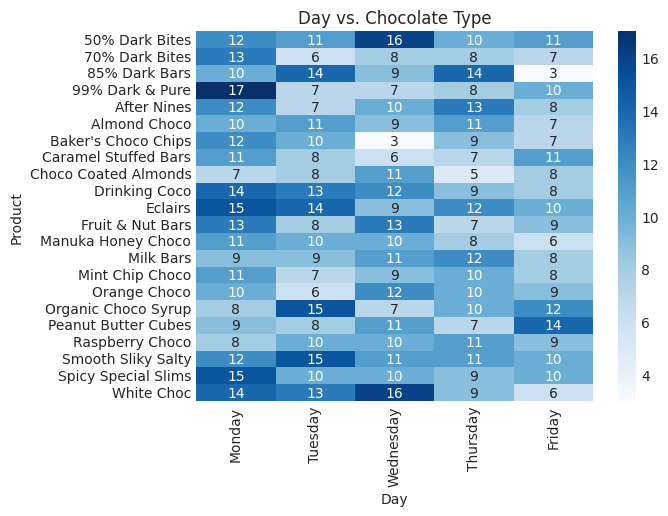

In [71]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

cross_tab = pd.crosstab(df["Product"], df["Day"])
cross_tab = cross_tab[days]
sns.heatmap(cross_tab, annot=True, cmap="Blues")
plt.title("Day vs. Chocolate Type")
plt.xticks(rotation=90)
plt.show()

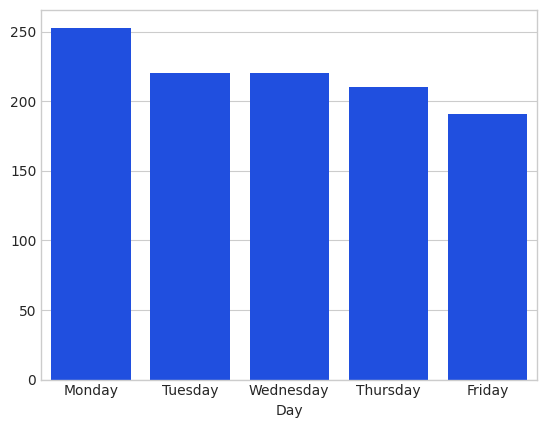

In [73]:

sns.barplot(cross_tab.sum())
plt.show()

In [ ]:
sns.kdeplot(data=df, x="Amount")

In [ ]:
procduct_count = df["Product"].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(procduct_count)
plt.xticks(rotation=90)
plt.show()

In [ ]:
procduct_count[procduct_count == procduct_count.min()].index[0]

In [ ]:
amt_shp_df = df.groupby("Product").sum()[["Amount", "Boxes Shipped"]]

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(amt_shp_df, x=amt_shp_df.index, y="Amount")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(amt_shp_df, x=amt_shp_df.index, y="Boxes Shipped")
plt.xticks(rotation=90)
plt.show()

In [ ]:
amt_shp_df["Amount per boxes shipped"] = amt_shp_df["Amount"] / amt_shp_df["Boxes Shipped"]

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(amt_shp_df, x=amt_shp_df.index, y="Amount per boxes shipped")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df

In [ ]:
day_sales = df.groupby("Day")["Amount"].sum()
day_sales = day_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

plt.figure(figsize=(10, 4))
sns.barplot( x=day_sales.index, y=day_sales.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
month_sales = df.groupby("Month")["Amount"].sum()
month_sales = month_sales.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])

plt.figure(figsize=(10, 4))
sns.barplot( x=month_sales.index, y=month_sales.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["Date"].dt.year.unique()